In [16]:
import pandas as pd
import numpy as np
from tqdm import tqdm

In [17]:
df = pd.read_csv('d2_ligands_docked.csv')

In [23]:
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit import DataStructs
from src.utils.finger import dense2sparse

class SimilarityCalculator():

    def __init__(self):
        train = pd.read_parquet('../data/train_data/train_morgan_512bits.parquet')
        train['fps'] = train['fps'].apply(eval).apply(lambda x: dense2sparse(x, 512))
        self.fps = train['fps'].values

    def get_max_train_similarity(self, smile):
        query_mol = Chem.MolFromSmiles(smile)
        query_fp = AllChem.GetMorganFingerprintAsBitVect(query_mol, 2, nBits=512)
        tanimotos = []
        for fp in tqdm(self.fps):
            train_fp = self.np_to_bv(fp)
            sim = DataStructs.TanimotoSimilarity(train_fp, query_fp)
            tanimotos.append(sim)
        return max(tanimotos)

    def np_to_bv(self,fv):
        bv = DataStructs.ExplicitBitVect(len(fv))
        for i,v in enumerate(fv):
            if v:
                bv.SetBit(i)
        return bv

In [24]:
calculator = SimilarityCalculator()
df['max_train_similarity'] = df['smiles'].apply(calculator.get_max_train_similarity)

 47%|████▋     | 463039/977743 [00:39<00:43, 11724.19it/s]


KeyboardInterrupt: 

In [14]:
import pandas as pd
df = pd.read_parquet('d2_ligands_w_tanimotos.parquet', index=False)

In [15]:
df['max_train_similarity'] = df['max_train_similarity'].apply(lambda x: round(x, 2))
df.drop(columns=['Unnamed: 0', 'mol']).to_csv('d2_ligands_w_tanimotos.csv', header=True)

In [16]:
df

,Unnamed: 0,idx,smiles,largest_ring,num_rings,qed,no_unwanted_frags,mol_wt,num_HBA,num_HBD,logP,num_rotatable_bonds,tpsa,bridgehead_atoms,spiro_atoms,mol,score,max_train_similarity
0,0,7635,COC1=NOCC=C1C(O)C2=CC=NC=C2N3CC=CC=C3OCC=C,6,3,0.790171,True,355.153206,7,1,2.45170,6,76.41,0,0,<rdkit.Chem.rdchem.Mol object at 0x14e69ece4460>,-6.89006,0.32
1,1,6484,CCNS(=O)(=O)CCC1=CC=CC=C1CC,6,1,0.824177,True,241.113650,2,1,1.73080,6,46.17,0,0,<rdkit.Chem.rdchem.Mol object at 0x14e69ece4520>,-7.17283,0.42
2,2,240,OC(C)C=NC=C(N1C=NC(C2=CC=CC=N2)=N1)C(CF)F,6,2,0.826979,True,307.124467,6,1,1.89770,6,76.19,0,0,<rdkit.Chem.rdchem.Mol object at 0x14e69ece45e0>,-7.68856,0.39
3,3,3427,C=1NCCCC=1S(=O)(C)CCC(CF)F,6,1,0.712871,True,239.115542,2,2,1.55540,5,29.10,0,0,<rdkit.Chem.rdchem.Mol object at 0x14e69ece4640>,-6.94619,0.27
4,4,91,CCCS(=O)(=O)C1=CC=CC=C1N2C=NCC2S,6,2,0.860119,True,284.065320,5,1,1.97450,4,49.74,0,0,<rdkit.Chem.rdchem.Mol object at 0x14e69ece4580>,-5.92116,0.41
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,95,364,C=CC=C1C(C=CC=C1)C2=CC=CC=C2O,6,2,0.788444,True,210.104465,1,1,3.71420,2,20.23,0,0,<rdkit.Chem.rdchem.Mol object at 0x148a8eb3a6a0>,-7.05284,0.33
996,96,8543,CC=CC1=CC=CC(=C1)OCC=O,6,1,0.657801,True,176.083730,2,0,2.29740,4,26.30,0,0,<rdkit.Chem.rdchem.Mol object at 0x148a8eb3a700>,-6.89813,0.51
997,97,6736,CCCC1=NC=CC=C1S(=O)(=O)N2C=NC3=CC(F)=CC(F)=C32,6,3,0.734181,True,337.069654,5,0,2.89900,4,64.85,0,0,<rdkit.Chem.rdchem.Mol object at 0x148a8eb3a760>,-8.59195,0.42
998,98,252,O=C(C=CC1=CC=CC=C1NC=C)CBr,6,1,0.654517,True,265.010226,2,1,3.21920,5,29.10,0,0,<rdkit.Chem.rdchem.Mol object at 0x148a8eb3a7c0>,-7.06293,0.50


In [17]:
import seaborn as sns

<Axes: xlabel='max_train_similarity', ylabel='Count'>

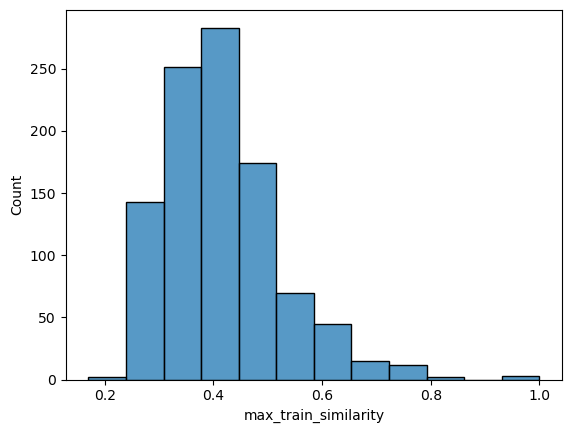

In [21]:
sns.histplot(df, x='max_train_similarity', bins=12)